In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from ideotype.data_process import read_data, agg_sims
from ideotype.analysis import identify_top_phenos, rank_all_phenos

In [ ]:
def make_simfig(run_name, pheno):
    df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
        f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')

    cols = ['date', 'jday', 'time',
            'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
            'RH', 'leaf_WP', 'PFD', 'Solrad',
            'temp_soil', 'temp_air', 'temp_can',
            'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
            'LAI_sunlit', 'LAI_shaded',
            'PFD_sunlit', 'PFD_shaded',
            'An_sunlit', 'An_shaded',
            'Ag_sunlit', 'Ag_shaded',
            'gs_sunlit', 'gs_shaded',
            'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
            'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
            'dm_dropleaf', 'dm_stem', 'dm_root',
            'soil_rt', 'mx_rootdept',
            'available_water', 'soluble_c', 'note']

    fig = plt.figure(figsize=(20,50))
    sites = df_sites.site

    for loc in np.arange(60):
        ax = fig.add_subplot(12,5,loc+1)
        ax.set_ylim(0,250),
        ax.set_xlim(0,4000)
        ax.annotate(f'{loc}: {sites[loc]} - {df_sites.iloc[loc]["state"]}', (200,220))
        site = sites[loc]
        years = df_sims.query(f'cvar=={pheno}').query(f'site=="{site}"').year

        for year in years:
            df = pd.read_csv(f'/home/disk/eos8/ach315/upscale/sims/{run_name}/{year}/var_{pheno}/out1_{site}_{year}_var_{pheno}.txt')
            df.columns = cols
            ax.plot(df.dm_ear, alpha=0.5)
            ax.annotate(year , (len(df), list(df.dm_ear)[-1]), color='grey')    

    plt.savefig(f'/home/disk/eos8/ach315/upscale/figs/sims_pheno{pheno}_{run_name}.png', format='png', dpi=300)    

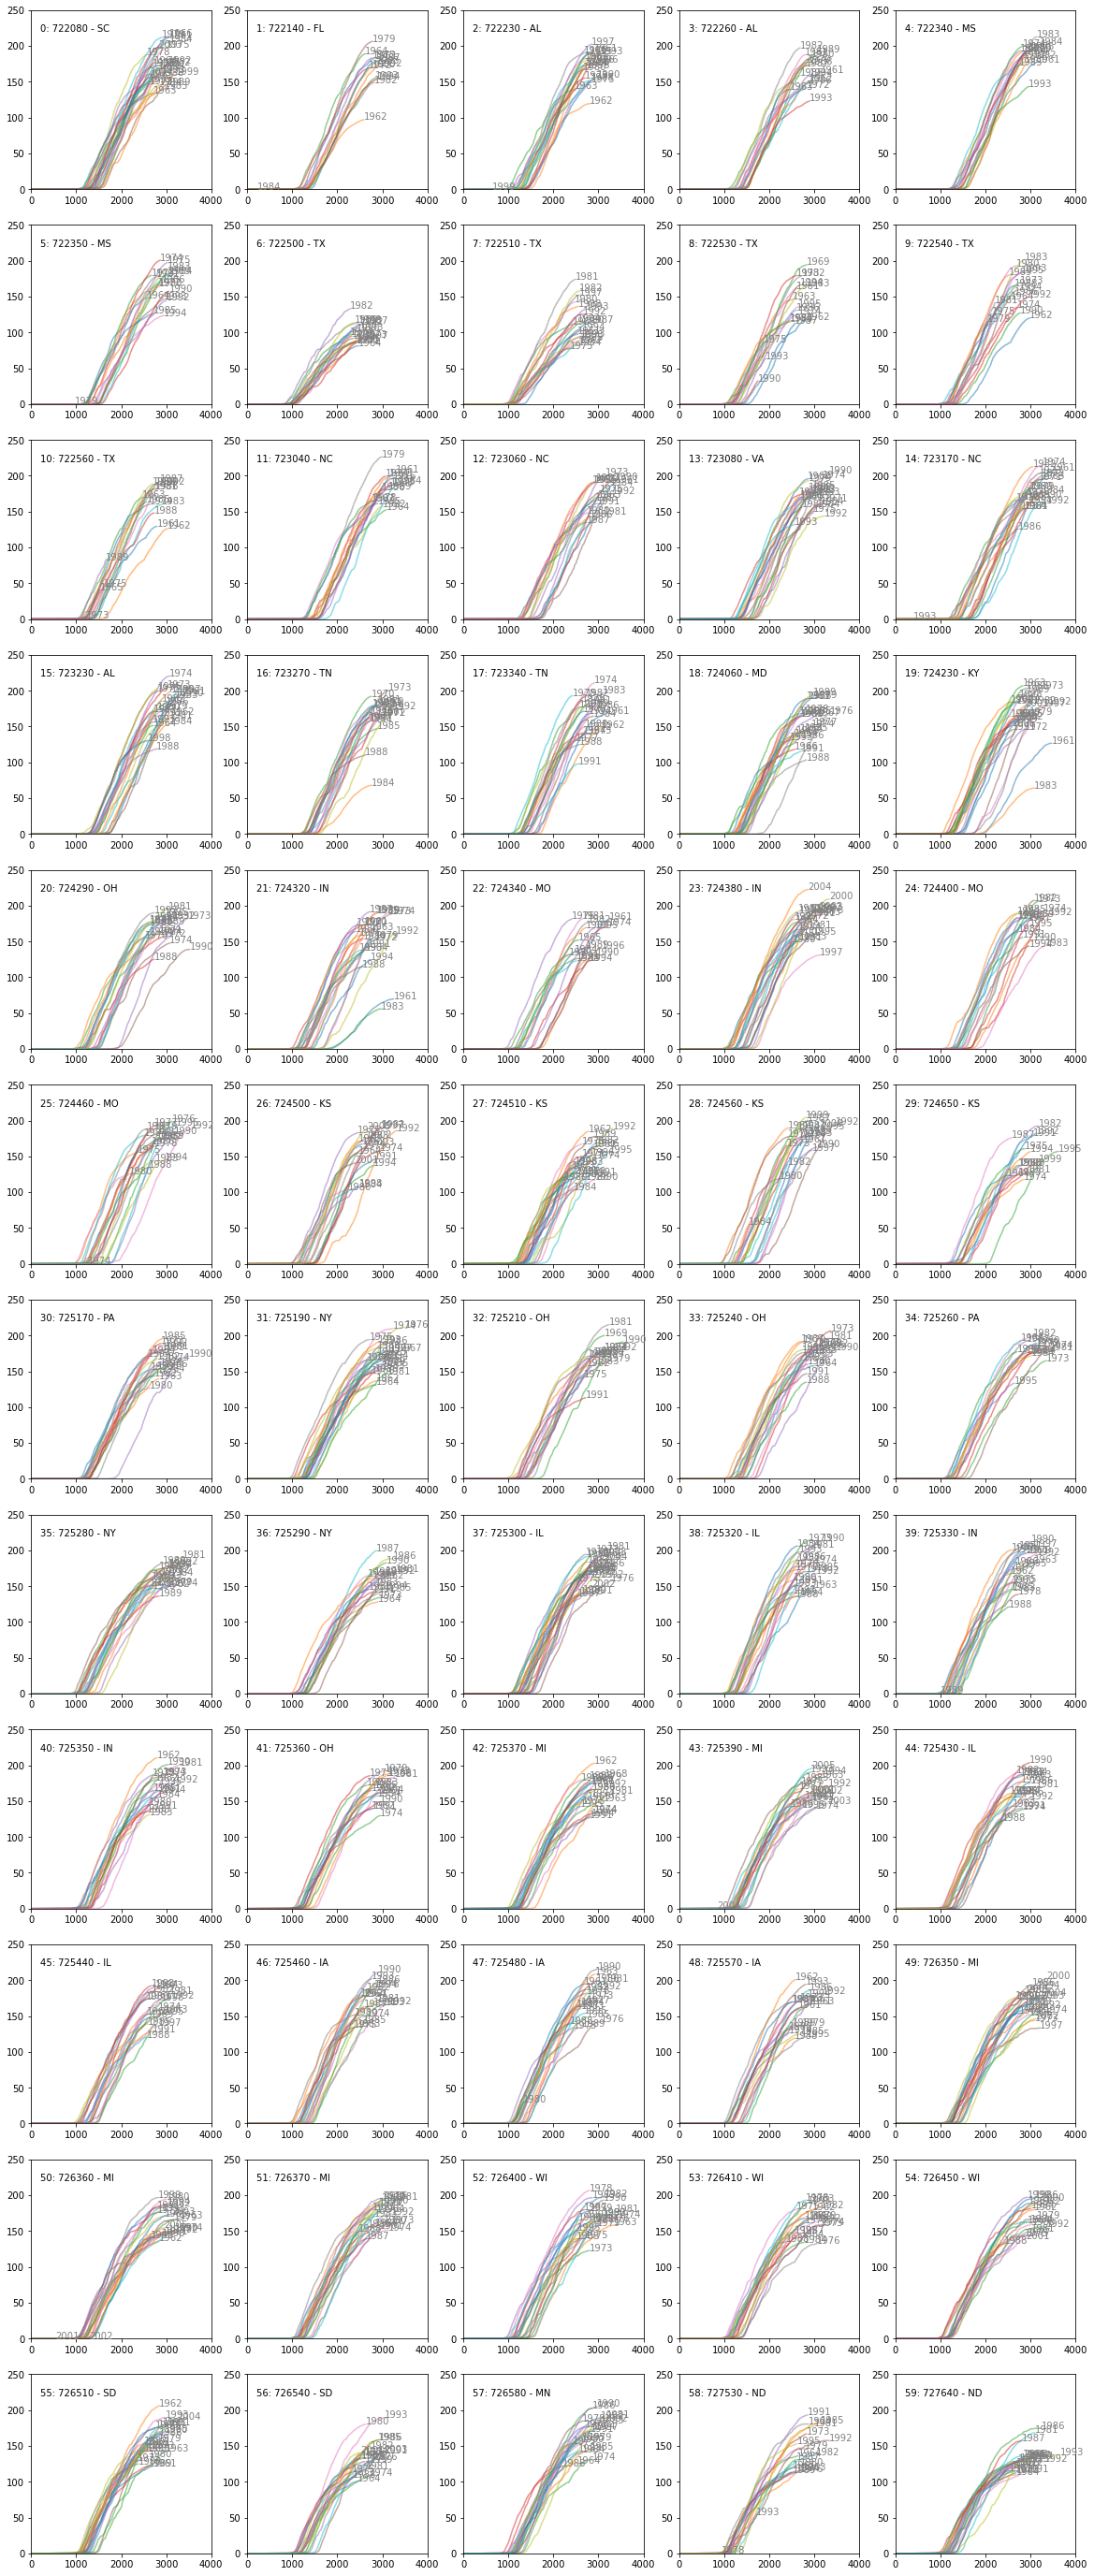

In [10]:
make_simfig('present', 63)